In [69]:
import json
import folium
import random

with open("barris-barrios.json", "r", encoding="utf-8") as f:
    barrios_data = json.load(f)

m = folium.Map(location=[39.4702, -0.3768], zoom_start=12, control_scale=True)

for barrio in barrios_data:
    nombre = barrio['nombre']
    geo_shape = barrio.get('geo_shape', {})

    # Localizamos las coordenadas:
    try:
        coords = geo_shape['geometry']['coordinates'][0]
    except (KeyError, IndexError, TypeError):
        print(f"No se pudieron leer las coordenadas del polígono para {nombre}")
        continue

    coords_latlon = [(c[1], c[0]) for c in coords]

    # Creamos un color aleatorio para cada polígono
    fill_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    # Añadimos el polígono al mapa
    folium.Polygon(
        locations=coords_latlon,
        color="black",        # Borde
        weight=1.5,           # Grosor del borde
        fill=True,
        fill_color=fill_color,
        fill_opacity=0.6,
        popup=nombre
    ).add_to(m)

    center = barrio.get('geo_point_2d')
    if center:
        lat = center['lat']
        lon = center['lon']
        # folium.Marker(
        #     location=[lat, lon],
        #     popup=f"{nombre}",
        #     icon=folium.Icon(color="blue", icon="info-sign")
        # ).add_to(m)

map_filename = "valencia_barrios.html"
m.save(map_filename)
m

In [70]:
area = {}

# Calcular las áreas y almacenarlas
for b1 in barrios_data:
    area[b1['nombre']] = b1['gis_gis_barrios_area']

# Calcular la media sin contar los valores None
valores_area = [v for v in area.values() if v is not None]
media_area = sum(valores_area) / len(valores_area) if valores_area else 0

# Sustituir los None por la media
for key, value in area.items():
    if value is None:
        area[key] = media_area

area

{"L'HORT DE SENABRE": 4263543.125,
 'CIUTAT JARDI': 5027684.202571428,
 'CAMI DE VERA': 5027684.202571428,
 'EL PALMAR': 5027684.202571428,
 'EL PERELLONET': 5027684.202571428,
 'VARA DE QUART': 5027684.202571428,
 'SOTERNES': 5027684.202571428,
 'LA FONTSANTA': 5027684.202571428,
 'EL BOTANIC': 3701155.9375,
 'BORBOTO': 5027684.202571428,
 'BENIFARAIG': 14228152.5,
 'TORMOS': 279952.0,
 'SANT ANTONI': 2497340.9375,
 'BENIMACLET': 7431831.875,
 'MARXALENES': 3903659.375,
 'EXPOSICIO': 3816096.875,
 'BETERO': 2553075.3125,
 'CABANYAL-CANYAMELAR': 1349264.0,
 'MESTALLA': 8435878.75,
 'EL PILAR': 1616061.5625,
 'EL PLA DEL REMEI': 3869178.4375,
 'ALBORS': 2560381.0938,
 'ARRANCAPINS': 8743740.625,
 'EN CORTS': 3640261.875,
 'POBLE NOU': 5027684.202571428,
 'LA TORRE': 5027684.202571428,
 'SANT FRANCESC': 4386583.125,
 'PENYA-ROJA': 9111358.75,
 'ELS ORRIOLS': 5027684.202571428,
 'FAVARA': 2802505.625,
 'CAMI REAL': 1477502.0,
 'LA FONTETA S.LLUIS': 2388267.3438,
 'LA PUNTA': 5027684.20257

In [71]:
import math
dist_matrix = {}
for b1 in barrios_data:
    for b2 in barrios_data:
        lat1, lon1 = b1["geo_point_2d"]["lat"], b1["geo_point_2d"]["lon"]
        lat2, lon2 = b2["geo_point_2d"]["lat"], b2["geo_point_2d"]["lon"]
        dist = math.sqrt((lat2 - lat1) ** 2 + (lon2 - lon1) ** 2) * 110  # Aproximación en km
        if dist == 0.0:
            # dist = math.sqrt(area[b1['nombre']])
            dist = random.uniform(1, 3)
        dist_matrix[(b1["nombre"], b2["nombre"])] = dist
dist_matrix

{("L'HORT DE SENABRE", "L'HORT DE SENABRE"): 2.5660144142061423,
 ("L'HORT DE SENABRE", 'CIUTAT JARDI'): 5.51503330014322,
 ("L'HORT DE SENABRE", 'CAMI DE VERA'): 5.781308780841824,
 ("L'HORT DE SENABRE", 'EL PALMAR'): 13.50918134076804,
 ("L'HORT DE SENABRE", 'EL PERELLONET'): 20.10196866241257,
 ("L'HORT DE SENABRE", 'VARA DE QUART'): 1.9786262784797233,
 ("L'HORT DE SENABRE", 'SOTERNES'): 2.984949983049285,
 ("L'HORT DE SENABRE", 'LA FONTSANTA'): 2.537935478531245,
 ("L'HORT DE SENABRE", 'EL BOTANIC'): 2.7611346694193846,
 ("L'HORT DE SENABRE", 'BORBOTO'): 7.443352473523906,
 ("L'HORT DE SENABRE", 'BENIFARAIG'): 8.183791091949265,
 ("L'HORT DE SENABRE", 'TORMOS'): 4.342759257009777,
 ("L'HORT DE SENABRE", 'SANT ANTONI'): 4.52618560299521,
 ("L'HORT DE SENABRE", 'BENIMACLET'): 5.018218492750196,
 ("L'HORT DE SENABRE", 'MARXALENES'): 3.8872806100142205,
 ("L'HORT DE SENABRE", 'EXPOSICIO'): 4.029760188770623,
 ("L'HORT DE SENABRE", 'BETERO'): 6.411114722269834,
 ("L'HORT DE SENABRE", '

In [72]:
import os
import math
import random
import json
from itertools import permutations

from Melodie import (
    Config,
    Simulator,
    Scenario,
    DataLoader,
    Environment,
    Agent,
    Model
)

###############################################################################
# 1) CONFIG
###############################################################################
class WasteCollectionConfig(Config):
    def __init__(self, total_steps, num_trucks):
        super().__init__(
            project_name="waste_collection",
            project_root=os.getcwd(),
            input_folder="input",
            output_folder="output"
        )
        self.total_steps = total_steps
        self.num_trucks = num_trucks
        self.max_capacity_container = 25
        self.max_capacity_truck = 50
        self.threshold = 0.9  # 90% of max_capacity
        self.cost_per_km = 1
        self.cost_per_truck = 10

###############################################################################
# 2) DATA LOADER
###############################################################################
class WasteCollectionDataLoader(DataLoader):
    def __init__(self, simulator, config, scenario_cls):
        super().__init__(simulator, config, scenario_cls)

    def generate_scenarios(self, manager_type: str):
        scenario = WasteCollectionScenario()
        self.load(scenario)
        return [scenario]

    def load(self, scenario: "WasteCollectionScenario"):
        with open("barris-barrios.json", "r", encoding="utf-8") as f:
            barrios_data = json.load(f)
        scenario.barrios_data = barrios_data

###############################################################################
# 3) SCENARIO
###############################################################################
class WasteCollectionScenario(Scenario):
    def __init__(self):
        super().__init__()
        self.barrios_data = []

    def setup(self):
        pass

###############################################################################
# 4) ENVIRONMENT
###############################################################################
from sklearn.cluster import KMeans
import numpy as np
import random
import math

class WasteCollectionEnvironment(Environment):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.barrios = []
        self.dist_matrix = {}

    def setup(self):
        scenario = self.model.scenario
        self.barrios = scenario.barrios_data
        self._build_dist_matrix()

    def _build_dist_matrix(self):
        """Construir la matriz de distancias entre los barrios."""
        for b1 in self.barrios:
            for b2 in self.barrios:
                lat1, lon1 = b1["geo_point_2d"]["lat"], b1["geo_point_2d"]["lon"]
                lat2, lon2 = b2["geo_point_2d"]["lat"], b2["geo_point_2d"]["lon"]
                dist = math.sqrt((lat2 - lat1) ** 2 + (lon2 - lon1) ** 2) * 110  # Aproximación en km
                self.dist_matrix[(b1["nombre"], b2["nombre"])] = dist

    def calculate_route_cost(self, route):
        """Calcular el costo de una ruta sumando las distancias entre barrios consecutivos."""
        cost = 0.0
        for i in range(len(route) - 1):
            cost += self.dist_matrix.get((route[i], route[i + 1]), 0)
        return cost

    def find_shortest_hamiltonian_cycle(self, start_barrio, barrios_subset):
        """
        Encuentra un ciclo hamiltoniano usando el algoritmo del vecino más cercano.
        """
        if not barrios_subset:
            return [start_barrio], 0.0

        # Asegurarse de que el barrio de inicio esté en el conjunto
        barrios_to_visit = set(barrios_subset)
        barrios_to_visit.add(start_barrio)

        route = [start_barrio]
        total_cost = 0.0
        current_barrio = start_barrio
        barrios_to_visit.remove(current_barrio)

        while barrios_to_visit:
            # Encuentra el barrio más cercano
            next_barrio = min(
                barrios_to_visit,
                key=lambda b: self.dist_matrix.get((current_barrio, b), float('inf'))
            )
            route.append(next_barrio)
            total_cost += self.dist_matrix.get((current_barrio, next_barrio), 0)
            current_barrio = next_barrio
            barrios_to_visit.remove(next_barrio)

        # Regresar al barrio de inicio para completar el ciclo
        total_cost += self.dist_matrix.get((current_barrio, start_barrio), 0) * 1
        # total_cost += len(self.model.trucks)
        route.append(start_barrio)

        return route, total_cost

    def apply_kmeans(self, barrios_desbordados, num_clusters):
        """
        Aplica KMeans a las coordenadas de los barrios desbordados para agruparlos en clusters.
        """
        # Obtener las coordenadas de los barrios desbordados
        coords = [(barrio["geo_point_2d"]["lat"], barrio["geo_point_2d"]["lon"]) for barrio in barrios_desbordados]
       
        if len(coords) < num_clusters:
            kmeans = KMeans(n_clusters=len(coords))
            kmeans.fit(coords)
        else:
            kmeans = KMeans(n_clusters=num_clusters)
            kmeans.fit(coords)

        # Agrupar los barrios en clusters
        barrio_clusters = {i: [] for i in range(num_clusters)}
        for idx, label in enumerate(kmeans.labels_):
            barrio_clusters[label].append(barrios_desbordados[idx])

        return barrio_clusters

    def step(self):
        # 1. Generar basura en cada contenedor
        for container in self.model.containers:
            container.generate_waste()

        # 2. Identificar barrios con basura desbordada
        overflowing_barrios = set([c.barrio_name for c in self.model.containers if c.is_full(self.model.config.threshold)])

        if not overflowing_barrios:
            return

        # Filtrar barrios desbordados
        barrios_desbordados = [barrio for barrio in self.barrios if barrio["nombre"] in overflowing_barrios]

        # 3. Aplicar KMeans para asignar barrios desbordados a camiones basados en la proximidad
        barrio_clusters = self.apply_kmeans(barrios_desbordados, self.model.config.num_trucks)

        # 4. Asignar barrios a camiones
        assignments = {truck.truck_id: [] for truck in self.model.trucks}
        for i, truck in enumerate(self.model.trucks):
            assigned_barrios = barrio_clusters[i]
            assignments[truck.truck_id] = [barrio["nombre"] for barrio in assigned_barrios]

        # 5. Asignar rutas a los camiones
        for truck in self.model.trucks:
            assigned_barrios = assignments[truck.truck_id]
            if assigned_barrios == []:
                truck.route = []
                truck.cost_incurred = 0.0 #len(self.model.trucks)
                continue

            # Seleccionar un barrio aleatorio como punto de inicio
            start_barrio = random.choice(assigned_barrios)
            # Calcular ciclo hamiltoniano dentro de los barrios asignados
            route, _ = self.find_shortest_hamiltonian_cycle(start_barrio, assigned_barrios)
            truck.route = route
            # truck.cost_incurred = cost

        # 6. Ejecutar las rutas de los camiones
        for truck in self.model.trucks:
            truck.run_route()


###############################################################################
# 5) AGENTS
###############################################################################
class ContainerAgent(Agent):
    def __init__(self, agent_id, model, barrio_name):
        super().__init__(agent_id)
        self.id = agent_id
        self.model = model
        self.barrio_name = barrio_name
        self.current_waste = 0.0

    def setup(self):
        self.max_capacity = self.model.config.max_capacity_container

    def generate_waste(self):
        new_waste = random.uniform(5, 10) * 1/(dist_matrix[('RUSSAFA', self.barrio_name)]+1) * (area[self.barrio_name]/1000000)
        self.current_waste += new_waste
        # print(f"Barrio {self.barrio_name} generó {new_waste:.2f} de basura. Total: {self.current_waste:.2f}")
        # self.current_waste = (random.uniform(90, 99) / 10) * self.max_capacity

    def empty(self):
        #print(f"Barrio {self.barrio_name} ha sido vaciado. Basura antes: {self.current_waste:.2f}")
        self.current_waste = 0.0
    
    def try_empty(self, max_capacity, current_load):
        if self.current_waste > (max_capacity - current_load):
            self.current_waste -= (max_capacity - current_load)
            return max_capacity, False
        else:
            self.current_waste = 0.0
            return current_load + self.current_waste, True


    def is_full(self, threshold=0.9):
        return self.current_waste >= threshold * self.max_capacity

class TruckAgent(Agent):
    def __init__(self, agent_id, model, truck_id):
        super().__init__(agent_id)
        self.model = model
        self.truck_id = truck_id
        self.route = []
        self.cost_incurred = 0.0
        self.current_load = 0.0

    def setup(self):
        self.max_capacity = self.model.config.max_capacity_truck

    def run_route(self):
        if not self.route:
            #print(f"Camión {self.truck_id} no tiene ruta para este paso.")
            return
        #print(f"Camión {self.truck_id} está ejecutando la ruta: {self.route} con costo: {self.cost_incurred:.2f}")
        init_pos = self.route[0]
        idx, not_end = 0, True
        total_cost = 0.0
        real_route = []

        while not_end:
            prev_barrio = self.route[0]
            for i, next_barrio in enumerate(self.route): # Recorremos los barrios
                # print(prev_barrio, next_barrio)
                re_visit = False
                for container in self.model.containers:
                    if (container.barrio_name == next_barrio) and (container.is_full()): # Intentamos vaciar el contenedor
                        # Tratamos de vaciar el contenedor
                        self.current_load, is_empty = container.try_empty(self.max_capacity, self.current_load)
                        # Calculamos el coste del viaje desde prev_barrio a next_barrio
                        total_cost += dist_matrix.get((next_barrio, prev_barrio), 0) * 1
                        # Haciendo un or sobre re_visit, controlamos si el barrio se tiene que volver a visitar
                        # ya que quedan contenedores sin vaciar.
                        re_visit = re_visit or is_empty
                        # print(f'Camión {self.truck_id} visita el barrio {next_barrio} y recoge el contenedor {container.id}')
                
                real_route.append(next_barrio)
                prev_barrio = next_barrio
                
                if not re_visit: # Si está vacío pasamos al siguiente barrio
                    # print('good')
                    idx += 1
                
                if self.current_load >= self.max_capacity: # Si nos hemos pasado de carga, tenemos que volver al origen a "descargar"
                    # print('go back')
                    # print(f'Camón {self.truck_id} se ha pasado de carga, volviendo a {init_pos}')
                    self.route = [init_pos] + self.route[idx:]
                    self.current_load = 0.0
                    idx = 0
                    break

                if i == len(self.route) - 1:
                    not_end = False
                    break
        
        # print(f'Ruta final del camión {self.truck_id}: {real_route}')
        self.cost_incurred = total_cost
        self.route = real_route.copy()

###############################################################################
# 6) MODEL
###############################################################################
class WasteCollectionModel(Model):
    def setup(self, time_threshold=3):
        self.environment = WasteCollectionEnvironment(self)
        self.environment.setup()
        self.time_threshold = time_threshold

        # Inicializar contenedores
        self.containers = [
            ContainerAgent(i * 3 + j, self, b["nombre"]) for i, b in enumerate(self.scenario.barrios_data) for j in range(3)
        ]
        for container in self.containers:
            container.setup()

        # Inicializar camiones
        self.trucks = [
            TruckAgent(1000 + i, self, i) for i in range(self.config.num_trucks)
        ]
        for truck in self.trucks:
            truck.setup()

        self.run_data = []

    def run(self):
        for step in range(self.config.total_steps):
            #print(f"\n=== STEP {step + 1} ===")
            self.environment.step()
            
            maximo = max([truck.cost_incurred for truck in self.trucks]) # Máxima distancia recorrida de entre todos los camiones
            total_time = maximo / 20.0 # Calculamos el tiempo que le toma a este camión hacer este recorrido, asumiendo que se desplazan, en promedio, a 20km/h
            
            if total_time > self.time_threshold: # Si al camión le cuesta más que cierto time_threshold (por defecto 3 horas, introducimos una penalización)
                penalty = maximo
            else:
                penalty = 0.0
            
            for truck in self.trucks:
                # print(truck.route)
                if truck.cost_incurred == 0.0:
                    additional_penalty = maximo
                    # print(f'MAXIMO: {maximo}')
                else:
                    additional_penalty = 0.0
                
                step_data = {
                    "step": step + 1,
                    "truck_id": truck.truck_id,
                    "route": truck.route,
                    "cost_incurred": truck.cost_incurred + penalty + additional_penalty #maximo/len(self.trucks)
                }
                self.run_data.append(step_data)

        self.save_run_data()

    def save_run_data(self):
        import pandas as pd
        import os
        df = pd.DataFrame(self.run_data)
        num_files = len([x for x in os.listdir('resultados/') if x.endswith('.csv')])
        df.to_csv(f"resultados/truck_routes_{num_files}.csv", index=False)
        print("\nDatos de las rutas guardados en truck_routes.csv")

In [73]:
import time
times = []
for num_trucks in [1,3,5,7,10,12,15,20,25,30,35,40,45,50,55,60,65,70]:
    for total_steps in [14]:
        for simulacion in range(5):
            print(f"Simulación con {num_trucks} y {total_steps}")
            simulator = Simulator(
                config=WasteCollectionConfig(num_trucks = num_trucks , 
                                             total_steps = total_steps),
                scenario_cls=WasteCollectionScenario,
                data_loader_cls=WasteCollectionDataLoader,
                model_cls=WasteCollectionModel
            )
            t1 = time.time()
            simulator.run()
            t2 = time.time()
            times.append(t2-t1)

simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0


Simulación con 1 y 14

Datos de las rutas guardados en truck_routes.csv


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.015s
    model-run     	 0.128s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.205s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0


Simulación con 1 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.254s
    model-run     	 0.153s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.467s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 1 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.014s
    model-run     	 0.204s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.284s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 1 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.153s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.227s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 1 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.011s
    model-run     	 0.151s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.225s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 3 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.154s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.28s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 3 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.193s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.265s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 3 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.003s
    model-run     	 0.146s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.262s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 3 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.016s
    model-run     	 0.161s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.242s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 3 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.156s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.263s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 5 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.18s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.308s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 5 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.176s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.251s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 5 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.153s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.229s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 5 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.123s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.212s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 5 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.16s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.289s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 7 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.236s
    model-run     	 0.317s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.618s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 7 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.143s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.213s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 7 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.142s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.214s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 7 y 14

Datos de las rutas guardados en truck_routes.csv


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.133s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.206s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0


Simulación con 7 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.144s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.213s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 10 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.015s
    model-run     	 0.172s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.256s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 10 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.17s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.29s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 10 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.013s
    model-run     	 0.186s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.308s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 10 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.014s
    model-run     	 0.141s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.27s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 10 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.129s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.2s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 12 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.178s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.295s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 12 y 14

Datos de las rutas guardados en truck_routes.csv


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.119s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.18s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0
simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.127s
    data-collect  	 0.0s



Simulación con 12 y 14

Datos de las rutas guardados en truck_routes.csv


simulator.py:327 INFO Simulator completed, time elapsed 0.197s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0


Simulación con 12 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.118s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.233s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 12 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.29s
    model-run     	 0.118s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.515s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 15 y 14

Datos de las rutas guardados en truck_routes.csv


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.117s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.185s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0


Simulación con 15 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.167s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.284s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0
simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.113s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.174s.



Datos de las rutas guardados en truck_routes.csv
Simulación con 15 y 14

Datos de las rutas guardados en truck_routes.csv
Simulación con 15 y 14


simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0
simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.006s
    model-run     	 0.13s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.243s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 15 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.116s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.23s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 20 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.26s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.324s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 20 y 14

Datos de las rutas guardados en truck_routes.csv


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.006s
    model-run     	 0.141s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.206s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0
simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.143s
    data-collect  	 0.0s



Simulación con 20 y 14

Datos de las rutas guardados en truck_routes.csv


simulator.py:327 INFO Simulator completed, time elapsed 0.216s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0


Simulación con 20 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.187s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.255s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 20 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.006s
    model-run     	 0.136s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.2s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 25 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.15s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.262s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 25 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.152s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.266s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 25 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.219s
    model-run     	 0.141s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.46s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 25 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.011s
    model-run     	 0.137s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.251s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 25 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.146s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.262s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 30 y 14

Datos de las rutas guardados en truck_routes.csv


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.138s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.206s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0


Simulación con 30 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.151s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.249s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 30 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.211s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.3s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 30 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.148s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.264s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 30 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.004s
    model-run     	 0.15s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.26s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 35 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.187s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.261s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 35 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.006s
    model-run     	 0.193s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.269s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 35 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.006s
    model-run     	 0.154s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.222s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 35 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.148s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.221s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 35 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.167s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.237s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 40 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.257s
    model-run     	 0.174s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.552s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 40 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.011s
    model-run     	 0.156s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.222s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 40 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.157s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.273s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 40 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.184s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.253s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 40 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.191s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.279s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 45 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.25s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.322s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 45 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.006s
    model-run     	 0.163s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.227s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 45 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.013s
    model-run     	 0.166s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.232s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 45 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.006s
    model-run     	 0.184s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.298s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 45 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.011s
    model-run     	 0.186s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.302s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 50 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.192s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.26s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 50 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.212s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.328s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 50 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.24s
    model-run     	 0.229s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.576s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 50 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.011s
    model-run     	 0.225s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.293s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 50 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.21s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.281s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 55 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.014s
    model-run     	 0.283s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.366s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 55 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.192s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.255s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 55 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.195s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.305s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 55 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.238s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.31s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 55 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.204s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.269s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 60 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.189s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.303s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 60 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.2s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.27s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 60 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.27s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.38s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 60 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.195s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.26s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 60 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.216s
    model-run     	 0.175s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.489s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 65 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.18s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.293s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 65 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.16s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.277s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 65 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.179s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.239s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 65 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.204s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.32s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 65 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.006s
    model-run     	 0.199s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.313s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 70 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.231s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.346s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 70 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.222s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.285s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 70 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.165s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.259s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 70 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.185s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.299s.
simulator.py:249 INFO Simulation started - id_scenario = 0, id_run = 0



Datos de las rutas guardados en truck_routes.csv
Simulación con 70 y 14


simulator.py:291 INFO Simulation completed - id_scenario = 0, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.171s
    data-collect  	 0.0s

simulator.py:327 INFO Simulator completed, time elapsed 0.23s.



Datos de las rutas guardados en truck_routes.csv


In [74]:
import pandas as pd
import os
num_files_per_exp = 5
 
files = [x for x in os.listdir('resultados/') if x.startswith('truck_routes') and x.endswith('.csv')]
blocks = len(files) // num_files_per_exp
 
files_rec = []
for block in range(blocks):
    files_rec.append([f'resultados/truck_routes_{num_files_per_exp * block + i}.csv' for i in range(num_files_per_exp)])


resultados = []   
for block in files_rec:
    coste_medio = []
    for file in block:
        df = pd.read_csv(file)
        coste_medio.append(df['cost_incurred'].sum())
    resultados.append(sum(coste_medio) / len(block))
    
resultados_dic = {}
i = 0
for num_trucks in [1,3,5,7,10,12,15,20,25,30,35,40,45,50,55,60,65,70]:
    for total_steps in [14]:
        resultados_dic[(num_trucks, total_steps)] = resultados[i]
        i+= 1
resultados_dic 

{(1, 14): np.float64(3760.573648488788),
 (3, 14): np.float64(3170.0617339450705),
 (5, 14): np.float64(1944.169986341704),
 (7, 14): np.float64(1680.1273092254348),
 (10, 14): np.float64(1864.8351856285342),
 (12, 14): np.float64(1837.8110107402274),
 (15, 14): np.float64(1750.840535601721),
 (20, 14): np.float64(1894.3305735493923),
 (25, 14): np.float64(2061.433020992511),
 (30, 14): np.float64(2350.841397626681),
 (35, 14): np.float64(2701.513696250952),
 (40, 14): np.float64(3244.9711376141704),
 (45, 14): np.float64(3994.189743815304),
 (50, 14): np.float64(4757.899765461995),
 (55, 14): np.float64(5788.722855031339),
 (60, 14): np.float64(7373.556165529141),
 (65, 14): np.float64(8921.989103029104),
 (70, 14): np.float64(10362.980430504624)}

In [75]:
files_rec

[['resultados/truck_routes_0.csv',
  'resultados/truck_routes_1.csv',
  'resultados/truck_routes_2.csv',
  'resultados/truck_routes_3.csv',
  'resultados/truck_routes_4.csv'],
 ['resultados/truck_routes_5.csv',
  'resultados/truck_routes_6.csv',
  'resultados/truck_routes_7.csv',
  'resultados/truck_routes_8.csv',
  'resultados/truck_routes_9.csv'],
 ['resultados/truck_routes_10.csv',
  'resultados/truck_routes_11.csv',
  'resultados/truck_routes_12.csv',
  'resultados/truck_routes_13.csv',
  'resultados/truck_routes_14.csv'],
 ['resultados/truck_routes_15.csv',
  'resultados/truck_routes_16.csv',
  'resultados/truck_routes_17.csv',
  'resultados/truck_routes_18.csv',
  'resultados/truck_routes_19.csv'],
 ['resultados/truck_routes_20.csv',
  'resultados/truck_routes_21.csv',
  'resultados/truck_routes_22.csv',
  'resultados/truck_routes_23.csv',
  'resultados/truck_routes_24.csv'],
 ['resultados/truck_routes_25.csv',
  'resultados/truck_routes_26.csv',
  'resultados/truck_routes_27.csv

In [76]:
import os
import pandas as pd

def calcular_media_por_grupo(csv_folder):
    """
    Esta función lee todos los archivos CSV en una carpeta, agrupa los archivos por 5 simulaciones
    y calcula la media de 'cost_incurred' para cada grupo.

    Args:
    - csv_folder: Ruta de la carpeta donde se almacenan los archivos CSV generados por las simulaciones.

    Returns:
    - medias_por_grupo: Un diccionario donde las claves son los índices de los grupos y los valores son las medias de 'cost_incurred'.
    """
    archivos_csv = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]
    archivos_csv.sort()
    medias_por_grupo = {}
    
    for i in range(0, len(archivos_csv), 5):
        # Subgrupo de 5 archivos
        grupo = archivos_csv[i:i+5]
        
        # Inicializar una lista para los costos totales de cada archivo en el grupo
        costos_totales = []
        
        for archivo in grupo:
            # Leer el archivo CSV
            df = pd.read_csv(os.path.join(csv_folder, archivo))
            
            # Asegurarnos de que la columna 'cost_incurred' exista
            if 'cost_incurred' in df.columns:
                # Sumar el costo de todas las rutas en el CSV
                costos_totales.append(df['cost_incurred'].sum())
            else:
                print(f"Advertencia: La columna 'cost_incurred' no se encuentra en el archivo {archivo}")
        
        if costos_totales:
            medias_por_grupo[i//5] = sum(costos_totales) / len(costos_totales)
    
    return medias_por_grupo


In [78]:
import pandas as pd
import folium
import json
import ast  # For converting route string to Python list
import random  # For generating random colors

# 1. Read the CSV file with routes
routes = pd.read_csv("resultados/truck_routes_0.csv")
# This CSV should have columns like: step, truck_id, route, cost_incurred

# 2. Load neighborhood coordinates from JSON
with open("barris-barrios.json", "r", encoding="utf-8") as f:
    barrios_data = json.load(f)

# Create a dictionary with {neighborhood_name: (lat, lon)}
barrio_coords = {}
for b in barrios_data:
    name = b["nombre"]
    lat = b["geo_point_2d"]["lat"]
    lon = b["geo_point_2d"]["lon"]
    barrio_coords[name] = (lat, lon)

# 3. Assign a unique color to each truck_id
# Generate a color palette or assign predefined colors
# Here, we'll assign random colors to each truck
unique_trucks = routes['truck_id'].unique()
truck_colors = {}
random.seed(42)  # For reproducibility
for truck in unique_trucks:
    # Generate a random color in HEX format
    color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    truck_colors[truck] = color

# 4. Create a Folium map centered in Valencia (adjust as needed)
valencia_center = [39.4699, -0.3763]  # Adjust to your desired location
m = folium.Map(location=valencia_center, zoom_start=12)

# 5. Organize routes by step
steps = routes['step'].unique()
steps = sorted(steps)  # Optional: sort the steps

# Create a dictionary to hold FeatureGroups for each step
step_layers = {}
for step in steps:
    # Create a FeatureGroup for each step
    fg = folium.FeatureGroup(name=f"Step {step}")
    step_layers[step] = fg
    m.add_child(fg)

# 6. Iterate through the DataFrame and add routes to corresponding step layers
for idx, row in routes.iterrows():
    step = row["step"]
    truck_id = row["truck_id"]
    cost = row["cost_incurred"]

    # The 'route' column is typically a string like "['Barrio1','Barrio2','Barrio3']".
    # Use ast.literal_eval to convert it to a Python list.
    route_str = row["route"]
    try:
        route_list = ast.literal_eval(route_str)
    except:
        route_list = []

    # Convert each neighborhood name to (lat, lon)
    points = []
    for barrio_name in route_list:
        if barrio_name in barrio_coords:
            points.append(barrio_coords[barrio_name])

    # Draw the route with PolyLine if there is more than one point
    if len(points) > 1:
        folium.PolyLine(
            locations=points,
            color=truck_colors.get(truck_id, "blue"),  # Use the truck's color
            weight=3,
            tooltip=f"Truck {truck_id}, Step {step}, Cost={cost:.2f}"
        ).add_to(step_layers[step])

        # Marker for start
        folium.Marker(
            location=points[0],
            popup=f"Start (Truck {truck_id}, Step {step})",
            icon=folium.Icon(color='green')
        ).add_to(step_layers[step])

        # Marker for end
        folium.Marker(
            location=points[-1],
            popup=f"End (Truck {truck_id}, Step {step})",
            icon=folium.Icon(color='red')
        ).add_to(step_layers[step])

    # If the route has a single point, draw a unique marker
    elif len(points) == 1:
        folium.Marker(
            location=points[0],
            popup=f"Single Point Route - Truck {truck_id}, Step {step}",
            icon=folium.Icon(color=truck_colors.get(truck_id, "blue"))
        ).add_to(step_layers[step])

# 7. Add a layer control to the map to toggle steps
folium.LayerControl(collapsed=False).add_to(m)

# 8. (Optional) Add a legend for truck colors
# Create a HTML string for the legend
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: auto; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     padding: 10px;
     ">
     <b>Truck Colors</b><br>
'''
for truck, color in truck_colors.items():
    legend_html += f'&nbsp;<i style="background:{color};width:10px;height:10px;display:inline-block;"></i>&nbsp;Truck {truck}<br>'
legend_html += '</div>'

m.get_root().html.add_child(folium.Element(legend_html))

# 9. Add neighborhood markers
for barrio in barrios_data:
    nombre = barrio['nombre']
    geo_shape = barrio.get('geo_shape', {})

    # Localizamos las coordenadas:
    try:
        coords = geo_shape['geometry']['coordinates'][0]
    except (KeyError, IndexError, TypeError):
        print(f"No se pudieron leer las coordenadas del polígono para {nombre}")
        continue

    coords_latlon = [(c[1], c[0]) for c in coords]

    # Añadimos el polígono al mapa
    folium.Polygon(
        locations=coords_latlon,
        color="black",        # Borde
        weight=0.5,           # Grosor del borde
        fill=True,
        fill_color="#FFFF00",  # Color de relleno, amarillo
        fill_opacity=0.01,
        popup=nombre
    ).add_to(m)

    # Agregar un marcador al centro de cada barrio
    if nombre in barrio_coords:
        lat, lon = barrio_coords[nombre]
        folium.Marker(
            location=[lat, lon],
            popup=f"Barrio: {nombre}",
            icon=folium.Icon(color="blue", icon="info-sign")
        ).add_to(m)

# 10. Display the map
m


In [130]:
routes = pd.read_csv("truck_routes.csv")

In [131]:
routes['cost_incurred'].sum()

456.3767808620104

In [168]:
mean_res = 1000000
res = []
for sim in range(1000):
    simulator = Simulator(
        config=WasteCollectionConfig(),
        scenario_cls=WasteCollectionScenario,
        data_loader_cls=WasteCollectionDataLoader,
        model_cls=WasteCollectionModel
    )
    simulator.run()
    routes = pd.read_csv("truck_routes.csv")
    res.append(routes['cost_incurred'].sum())
    if routes['cost_incurred'].sum() < mean_res:
            mean_res = routes['cost_incurred'].sum()
            routes2 = routes

db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.164s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.188s.



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.168s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.193s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.013s
    model-run     	 0.187s
    data-collect  	 0.0s




=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:246 INFO Simulator completed, time elapsed 0.213s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.138s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.161s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.16s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.178s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.168s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.185s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.145s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.164s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.135s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.155s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.196s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.364s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.143s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.168s.



Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.15s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.171s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.143s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.163s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.151s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.172s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.136s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.154s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.139s
    data-collect  	 0.0s




=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:246 INFO Simulator completed, time elapsed 0.157s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.205s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.225s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.182s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.204s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.134s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.154s.
db.py:122 INFO Database contains tables: [].



Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.141s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.16s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.141s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.163s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.14s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.16s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.137s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.156s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.16s
    data-collect  	 0.0s




=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:246 INFO Simulator completed, time elapsed 0.181s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.181s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.203s.
db.py:122 INFO Database contains tables: [].



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.138s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.161s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.146s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.169s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.011s
    model-run     	 0.144s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.166s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.151s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.174s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.156s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.323s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.2s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.223s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.156s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.18s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.149s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.172s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.142s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.161s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.14s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.159s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.134s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.153s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.145s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.163s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.193s
    data-collect  	 0.0s




=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:246 INFO Simulator completed, time elapsed 0.212s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.179s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.201s.
db.py:122 INFO Database contains tables: [].



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.14s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.16s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.142s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.16s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.148s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.167s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.163s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.187s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.145s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.164s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.178s
    data-collect  	 0.0s




Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:246 INFO Simulator completed, time elapsed 0.197s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.012s
    model-run     	 0.165s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.189s.



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.133s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.151s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.139s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.157s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.153s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.174s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].



=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.152s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.325s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.153s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.172s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.197s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.218s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.14s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.166s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.146s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.164s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.144s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.164s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.139s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.159s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.137s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.156s.
db.py:122 INFO Database contains tables: [].



Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.14s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.159s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.204s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.224s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.164s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.187s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.139s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.159s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.152s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.172s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.139s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.16s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.143s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.162s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.143s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.166s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.182s
    data-collect  	 0.0s




=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:246 INFO Simulator completed, time elapsed 0.203s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.013s
    model-run     	 0.178s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.206s.
db.py:122 INFO Database contains tables: [].



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.135s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.154s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.145s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.164s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.158s
    model-run     	 0.15s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.32s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.145s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.165s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.154s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.176s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.202s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.224s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.139s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.163s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.145s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.164s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.138s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.159s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.137s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.155s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.134s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.154s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.136s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.156s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.195s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.215s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.014s
    model-run     	 0.177s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.203s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.14s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.16s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.144s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.165s.
db.py:122 INFO Database contains tables: [].



Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.134s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.159s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.139s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.16s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.144s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.166s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.182s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.204s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.187s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.209s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.135s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.158s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].



=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.135s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.294s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.146s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.165s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.149s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.169s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.14s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.161s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.011s
    model-run     	 0.198s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.222s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.166s
    data-collect  	 0.0s




Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:246 INFO Simulator completed, time elapsed 0.192s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.14s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.159s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.009s
    model-run     	 0.145s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.166s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.008s
    model-run     	 0.157s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.178s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.141s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.159s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===


simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.142s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.162s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.007s
    model-run     	 0.171s
    data-collect  	 0.0s




Datos de las rutas guardados en truck_routes.csv

=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


simulator.py:246 INFO Simulator completed, time elapsed 0.189s.
db.py:122 INFO Database contains tables: [].
db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0
simulator.py:210 INFO Simulation completed - id_scenario = None, id_run = 0
    model-setup   	 0.01s
    model-run     	 0.175s
    data-collect  	 0.0s

simulator.py:246 INFO Simulator completed, time elapsed 0.197s.
db.py:122 INFO Database contains tables: [].



=== STEP 1 ===

=== STEP 2 ===

=== STEP 3 ===

=== STEP 4 ===

=== STEP 5 ===

=== STEP 6 ===

=== STEP 7 ===

Datos de las rutas guardados en truck_routes.csv


db.py:126 INFO Database drops tables: [].
simulator.py:158 INFO Simulation started - id_scenario = None, id_run = 0



=== STEP 1 ===


ValueError: n_samples=2 should be >= n_clusters=3.

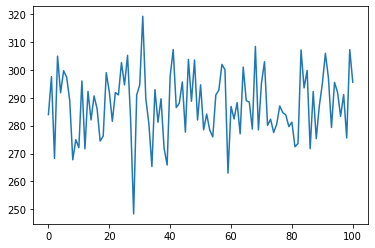

In [169]:
import matplotlib.pyplot as plt
plt.plot(res)

In [174]:
routes2.loc[routes2['cost_incurred']!=0]

,step,truck_id,route,cost_incurred
0,1,0,"['MALILLA', 'RUSSAFA', 'ARRANCAPINS', 'MALILLA']",5.320621
3,2,0,"['NA ROVELLA', 'MONTOLIVET', 'LA GRAN VIA', 'E...",16.470373
4,2,1,"['LA CREU COBERTA', 'MALILLA', 'EN CORTS', 'RU...",11.707803
5,2,2,"['TORREFIEL', 'BENIFARAIG', 'TORREFIEL']",6.908497
6,3,0,"['AIORA', 'LA CREU DEL GRAU', 'PENYA-ROJA', 'C...",7.739344
7,3,1,"['MALILLA', ""EL FORN D'ALCEDO"", 'LA TORRE', ""L...",15.970995
8,3,2,"['LA XEREA', 'EXPOSICIO', 'MORVEDRE', 'EL CARM...",11.528124
9,4,0,"['BENIFARAIG', 'CARPESA', 'TORREFIEL', 'MARXAL...",10.433827
10,4,1,"['SANT MARCEL.LI', 'FAVARA', 'SAFRANAR', 'PATR...",14.219548
11,4,2,"['LA CARRASCA', 'LA MALVA-ROSA', 'CAMI DE VERA...",27.331824


In [175]:
mean_res

248.3737218051463